KODIKALLA PREETHAM KRISHNA TASK 5 EXPLORING BUSINESS ANALYTICS

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline
from sklearn import datasets
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Home\Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Correlation

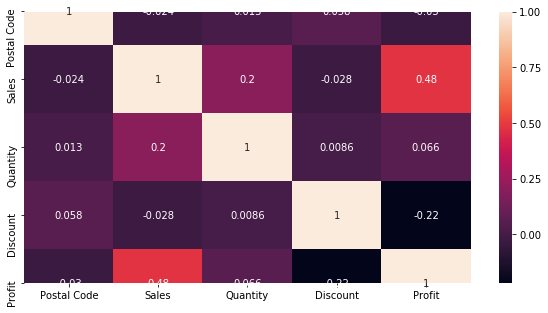

In [6]:
correlation=df.corr()
plt.figure(figsize=(10,5))
sea.heatmap(correlation,annot=True)

In [7]:
df2=df.drop(['Country','Postal Code','Quantity','Discount'],axis=1)
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.5164


Text(0.5, 1.0, 'Category -- Region wise')

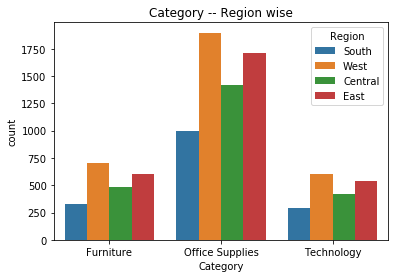

In [8]:
sea.countplot(x='Category',hue='Region',data=df2)
plt.title("Category -- Region wise")

Text(0.5, 1.0, 'Sub-Category -- Region wise')

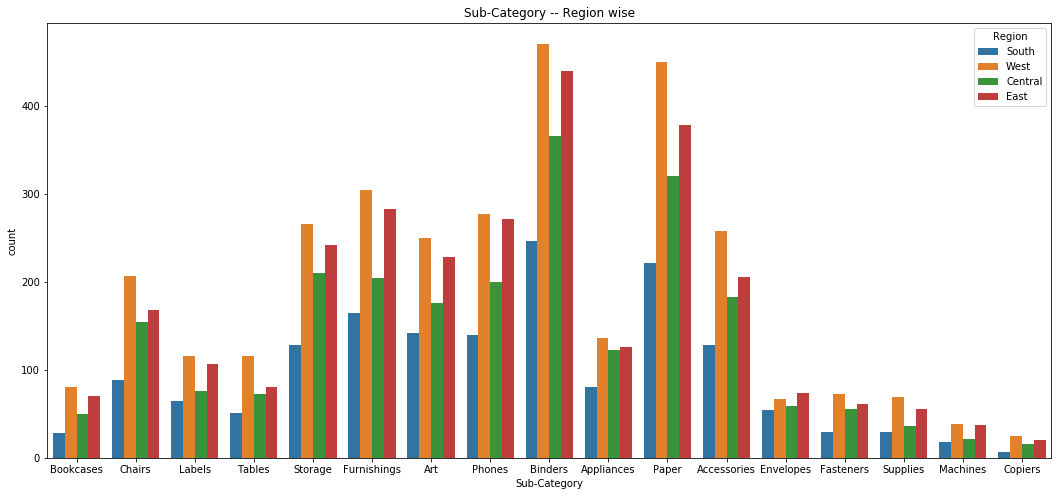

In [9]:
plt.figure(figsize=(18,8))
sea.countplot(x='Sub-Category',hue='Region',data=df2)
plt.title("Sub-Category -- Region wise")

Text(0.5, 1.0, 'Sales Vs Profits -- Segment wise')

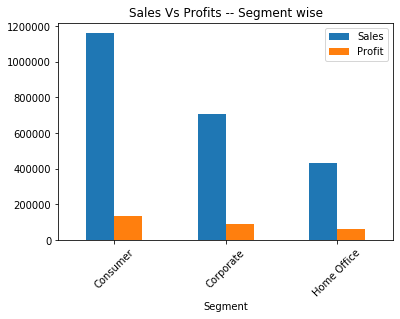

In [10]:
df2.groupby(['Segment']).sum()[['Sales','Profit']].plot.bar()
plt.xticks(rotation=45)
plt.title("Sales Vs Profits -- Segment wise")

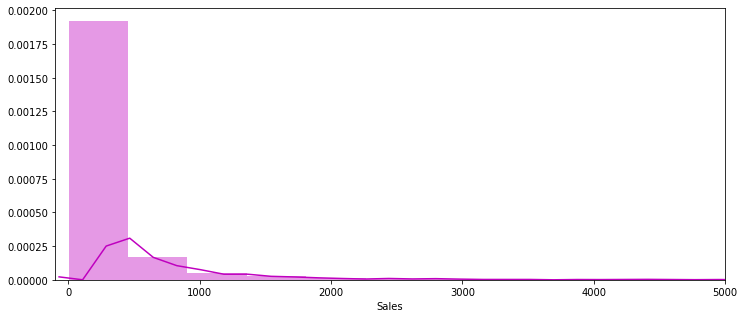

In [28]:
plt.figure(figsize=(12,5))
sns.distplot(df['Sales'],color='m')
plt.xlim(-100,5000)
plt.show()

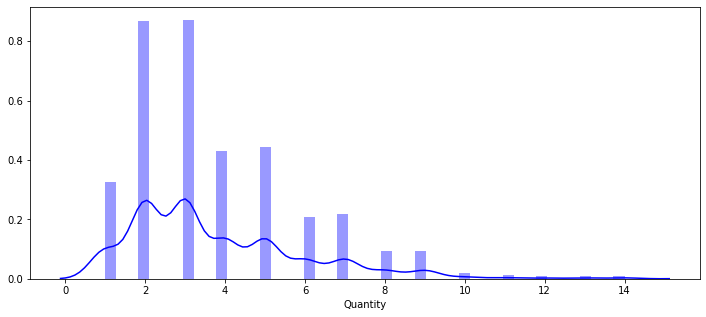

In [29]:
plt.figure(figsize=(12,5))
sns.distplot(df['Quantity'], color= 'blue')
plt.show()

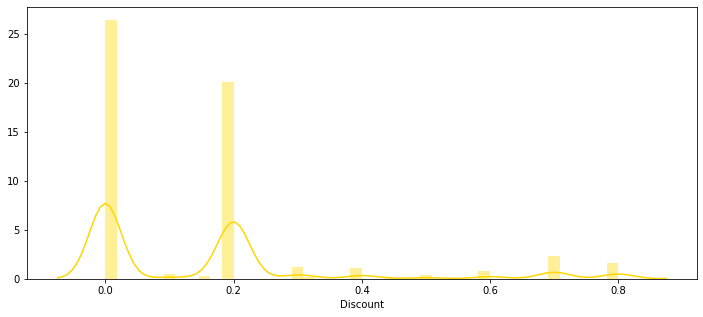

In [30]:
plt.figure(figsize=(12,5))
sns.distplot(df['Discount'], color= 'gold')
plt.show()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


Text(0.5, 1.0, 'Percentage of sales in diff Regions of USA')

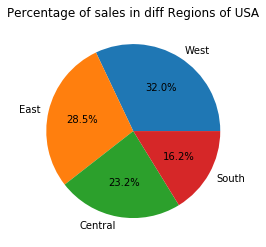

In [14]:
#Visualizing Region
theme = plt.get_cmap('hsv')
print(df['Region'].value_counts())
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales in diff Regions of USA')

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


Text(0.5, 1.0, 'Percentage of sales for different categories')

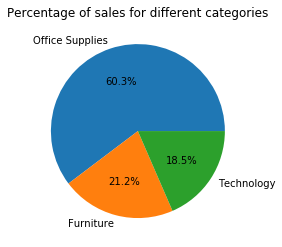

In [15]:
#Visualizing Category
print(df['Category'].value_counts())
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales for different categories')

In [22]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


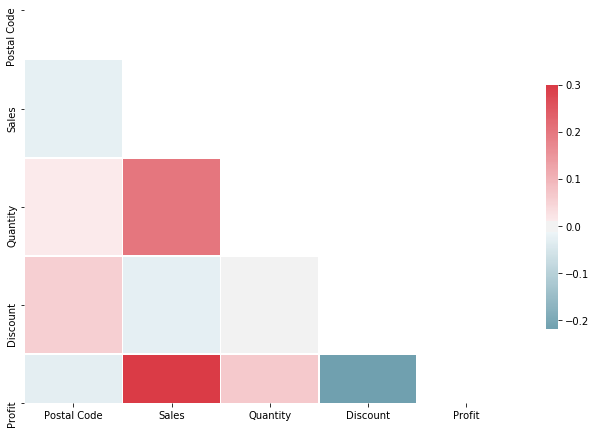

In [17]:
# Let us get the correlation in the data
import numpy as np
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

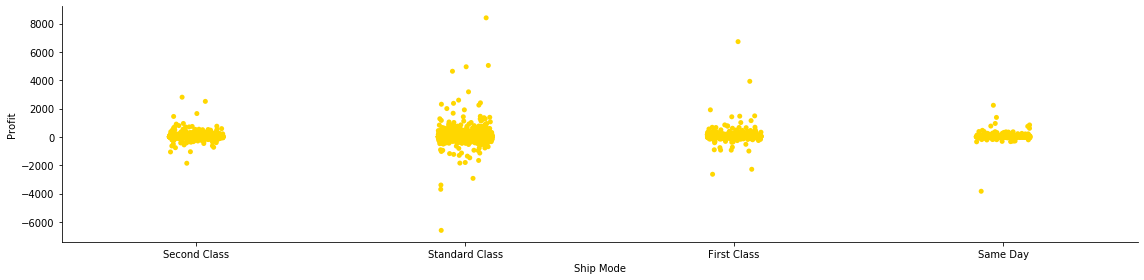

In [26]:
sns.catplot(x="Ship Mode", y="Profit", data=df, color='gold', height=4, aspect=4);

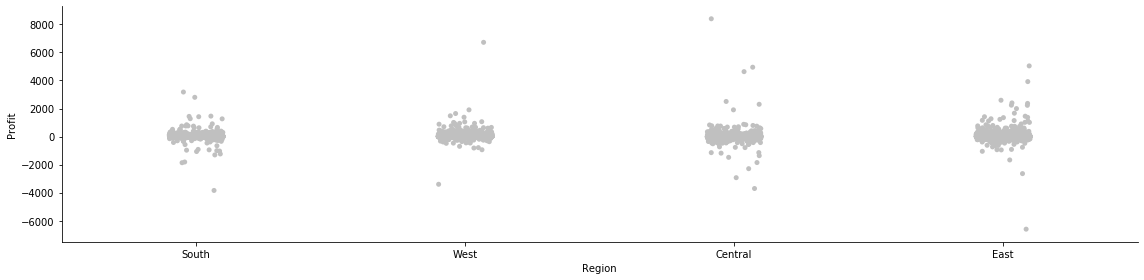

In [27]:
sns.catplot(x="Region", y="Profit", data=df, color='silver', height=4, aspect=4);

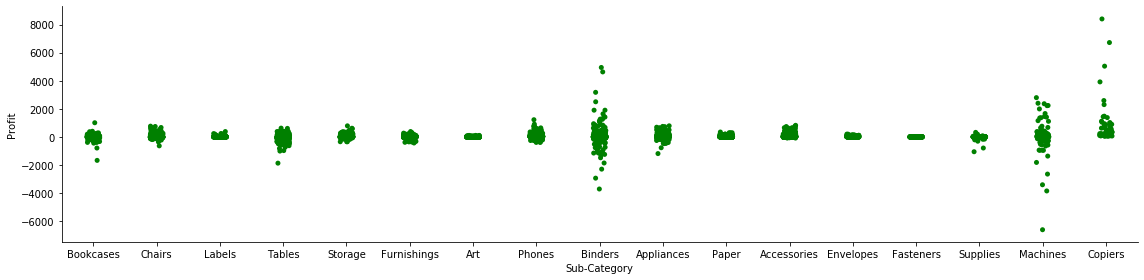

In [24]:
sns.catplot(x="Sub-Category", y="Profit", data=df, color='green', height=4, aspect=4);

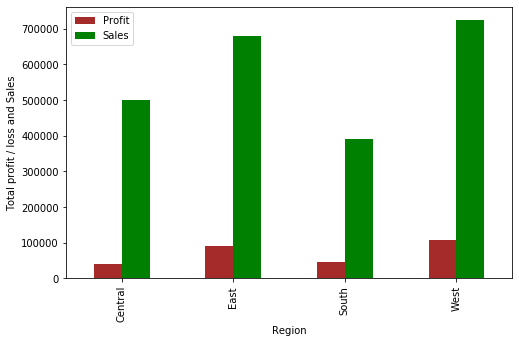

In [21]:
#Region wise analysis of profit and sales
df.groupby('Region')[['Profit', 'Sales']].sum().plot.bar(color = ["brown", "green"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

by observing the graphs we came to know that although profit and sales are related to each other they are not in proportion. binders are varied highly and copiers are highly profitable 